# Practice Problem Sets for AstroPy

__1. Exercises (easy) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years?          (advanced) Define a new unit called "baro-meter", which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the Astropy documentation on combining and defining units for an example how to do this (For other ways to measure the height of a building using a barometer see barometer question on Wikipedia...)     (expert) Find the frequency with the maximum photon rate of the black body spectrum B(ν,T) with temperature T=5000 K. For this you can use a numerical optimization routine such as scipy.optimize.minimize. As the frequency as well as the radiance can cover many orders of magnitude, the stability of the algorithm can be much improved by minimizing the (negative) logarithm of the radiance −log⁡B as well as minimizing with respect to the logarithm of the frequency by introducing the variable x=log⁡ν. Finally compare the result against the analytical solution from Wien's displacement law.__

In [101]:
from astropy import constants as const
import astropy.units as u

In [102]:
# easy # Earth-Sun
distance = 1 * u.au
# velocity is speeed of light
time = distance/const.c
print("Light travel from Sun To Earth in {:.5f}".format(time.to('min')))

Light travel from Sun To Earth in 8.31675 min


In [103]:
# light comming from Galactic centre-Earth
distance_gc = 8 * u.kpc 
time_gc = distance_gc/const.c

In [104]:
print("Light travel from Galctic Center to Earth in {:.5f}".format(time_gc.to('min')))

Light travel from Galctic Center to Earth in 13723616673.91187 min


In [105]:
print("Light travel from Galctic Center to Earth in {:.5f}".format(time_gc.to('year')))

Light travel from Galctic Center to Earth in 26092.51022 yr


In [106]:
# Advanced using u.def_unit to define a new unit

bm = u.def_unit('baro-meter', 25*u.cm)
u.add_enabled_units(bm)

In [107]:
# given height = 381 m 
heightm = 381 * u.m
heightcm = heightm.to('cm')
heightcm

<Quantity 38100. cm>

In [108]:
heightbm = heightcm.to("baro-meter")
print("The height of the empire state building in baro-meters is {}".format(heightbm))

The height of the empire state building in baro-meters is 1524.0 baro-meter


------
__SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.__

In [109]:
# Expert
@u.quantity_input(frequency=u.hertz,temperature=u.K) # to avoid any kind of error
def blackbody(frequency,temperature):
    pre_factor =  2 * const.h * frequency **3 /const.c**2
    expo_factor = 1/(np.exp(const.h * frequency / const.K_b * T))  -1
    return (pre_factor * expo_factor)

In [110]:
from scipy.optimize import minimize

------------

# Coordinates

(easy) __Define the sky coordinate for your favorite object and find the distance to the crab nebula and Galactic center.__

In [111]:
from astropy.coordinates import SkyCoord

# Coordinate of PKS2155-305
# coord_pks = SkyCoord.from_name('pks2155-304')
coord_pks = SkyCoord("21h58m52.7s", "-30d13m18s", frame="icrs")

# Coordinate of the Crab Nebula
# coord_crab = SkyCoord.from_name('crab')
coord_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')

separation_crab = coord_pks.separation(coord_crab)
print('The angular distance between PKS2155-204 and the Crab Nebula is {:.2f}'.format(separation_crab))

# Coordinate of the Galactic Center
coord_gc = SkyCoord(0, 0, unit='deg', frame='galactic')
separation_gc = coord_pks.separation(coord_gc)
print('The angular distance between PKS2155-204 and the Galactic Center is {:.2f}'.format(separation_gc))

The angular distance between PKS2155-204 and the Crab Nebula is 120.89 deg
The angular distance between PKS2155-204 and the Galactic Center is 54.33 deg


(expert) __Make a plot of the height above horizon vs.time for the crab position at the location of Annecy. Mark the the time range where it is visible. Would the crab be visible tonight?__

In [112]:
from astropy.coordinates import EarthLocation,AltAz
from astropy.time import Time
from astropy.visualization import quantity_support
import numpy as np
import matplotlib.pyplot as plt

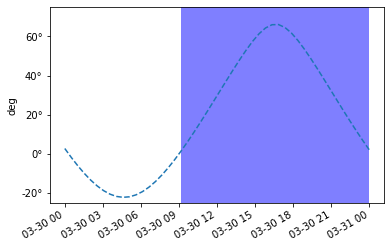

In [113]:
# define coordinate for crab nebula
coord_crab = SkyCoord(83.63 * u.deg , 22.02 * u.deg, frame ='icrs')

# location on earth  Annecy,France
annecy = EarthLocation(lat= 45.8058 * u.deg, lon=6.5726 * u.deg)

# array of Times
time_intervals = np.linspace(0*u.day,1*u.day,48) # here we have taken one day with interval of 30 minutes

time_start = Time('2022-03-30 00:00:00')
times = Time(time_start + time_intervals)

# AltAz coordinates for the given location
altaz = AltAz(obstime = times , location= annecy)
crab_altaz = coord_crab.transform_to(altaz)

# altitude over the horizon
altitudes = crab_altaz.alt.to('deg')

# times when altitude is greater than zero
above_horizon = altitudes > 0 * u.deg

with quantity_support():
    plt.plot_date(times.plot_date,altitudes,fmt='--')
    
    # orient date labels at a slant
    
    plt.gcf().autofmt_xdate() 
    
    alt_min, alt_max = -25 * u.deg, 75 * u.deg
    plt.fill_between(times.plot_date,
                     alt_min, alt_max,
                     where=above_horizon,
                     facecolor='blue',
                     alpha=0.5)
    plt.ylim(alt_min, alt_max)

## Tables

### (easy) Add columns with the RA and DEC coordinates of the objects to the example table.

In [114]:
# let's create an example table add the rec and dec columns gto it 
from astropy.table import Table

In [115]:
table = Table()
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A']
table['GLON'] = [184.55754381, 0, 111.74169477] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151] * u.deg

In [116]:
table

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


In [117]:
# Create SkyCoord object holding all 3 sky coordinates n galctric frame
coords = SkyCoord(table['GLON'], table['GLAT'], frame='galactic')

In [118]:
# Add new columns (the specified coordinates in ircs frame)
table['RA'] = coords.icrs.ra
table['DEC'] = coords.icrs.dec

In [119]:
table # here we have added the required columns with the (table['xyz']) argument

Source_Name,GLON,GLAT,RA,DEC
,deg,deg,deg,deg
str6,float64,float64,float64,float64
Crab,184.55754381,-5.78427369,83.63320833052822,22.014472226225813
Sag A*,0.0,0.0,266.4049882865447,-28.936177761791473
Cas A,111.74169477,-2.13544151,350.8664167089621,58.81177779991024


### (advanced ) Load the Fermi 2FHL catalog table ('data/fermi_2fhl_catalog.fits') and find the brighest source (the brightness value is stored in the 'Flux50' column). What is the common name of the source (column 'ASSOC')? Find all sources within 10 deg from the position of this source.

In [120]:
# let's first open the fits file and see what do it have for us
fermi_2 = Table.read('/Users/dhruvkumar/Desktop/fermi_2fhl_catalog.fits', hdu=1)

In [121]:
fermi_2 # nicely, opened the catalog now let's do our anylasysis

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J0008.1+4709,2.044,47.164,115.339,-15.069,0.061,0.098,28.6,6.24,2.75,3.96,3.19,2.16,4.21,1.2300e-11,6.7100e-12,1.2100e-12,6.7100e-13,3.3634e-12,-1.5367e-12 .. 2.1609e-12,5.35,4.3495e-18,-- .. 4.7539e-12,0.00,8.4487e-18,-- .. 7.2910e-12,0.00,4.00,68.15,0.99,1,MG4 J000800+4712,0.9972,0.8348,bll,2.10000,2.5119e+15,3FGL J0008.0+4713,1FHL J0007.7+4709,--
2FHL J0009.3+5031,2.343,50.522,116.124,-11.793,0.045,0.073,54.0,5.08,1.66,--,--,--,--,1.9100e-11,7.8200e-12,2.0300e-12,8.7900e-13,8.3628e-12,-2.9896e-12 .. 3.8951e-12,7.35,2.9146e-17,-- .. 5.1000e-12,0.00,3.5087e-16,-- .. 4.8746e-12,0.00,6.40,72.76,1.00,1,NVSS J000922+503028,0.9997,0.7348,bll,0.00000,1.4125e+15,3FGL J0009.3+5030,1FHL J0009.2+5032,--
2FHL J0018.5+2947,4.635,29.788,114.463,-32.542,0.037,0.060,30.9,2.58,0.99,2.41,1.04,2.40,1.04,1.0600e-11,6.1500e-12,2.0500e-12,1.7200e-12,9.6544e-12,-5.5534e-12 .. 5.5534e-12,5.77,1.1790e-15,-- .. 5.3787e-12,0.00,1.6047e-16,-- .. 6.1201e-12,0.00,3.00,127.32,1.00,3,RBS 0042,0.9999,0.9785,bll,0.10000,5.9156e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,--
2FHL J0022.0+0006,5.500,0.106,107.172,-61.862,0.051,0.082,30.0,1.86,0.57,0.95,0.72,0.88,0.71,1.9700e-11,9.5600e-12,6.8600e-12,5.2900e-12,1.6120e-11,-7.1726e-12 .. 9.9535e-12,5.38,3.6392e-12,-4.3864e-12 .. 4.3864e-12,1.39,8.4236e-16,-- .. 7.3424e-12,0.00,4.80,180.13,0.86,2,5BZGJ0022+0006,0.9993,0.9001,bll-g,0.30600,4.3152e+16,--,--,--
2FHL J0033.6-1921,8.411,-19.358,94.280,-81.222,0.035,0.056,148.3,3.32,0.69,2.56,0.88,2.33,0.92,5.4600e-11,1.5000e-11,7.6200e-12,2.6900e-12,4.0016e-11,-1.0162e-11 .. 1.2238e-11,12.17,2.1390e-12,-- .. 8.2581e-12,0.91,2.4395e-17,-- .. 6.8423e-12,0.00,13.80,170.01,0.99,2,KUV 00311-1938,0.9998,0.9814,bll,0.61000,8.3176e+15,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-193
2FHL J0035.8+5949,8.962,59.831,120.972,-2.981,0.032,0.051,402.4,2.23,0.21,--,--,--,--,1.2500e-10,1.9000e-11,3.1100e-11,7.2300e-12,9.4229e-11,-1.5257e-11 .. 1.7157e-11,17.31,2.6699e-11,-7.6282e-12 .. 9.4508e-12,10.39,3.7261e-16,-- .. 4.6744e-12,0.00,46.50,247.62,0.96,4,1ES 0033+595,1.0000,0.9929,bll,0.00000,1.3183e+17,3FGL J0035.9+5949,1FHL J0035.9+5950,TeV J0035+598
2FHL J0040.3+4049,10.095,40.832,120.676,-21.992,0.036,0.057,26.8,2.12,0.81,--,--,--,--,1.0500e-11,6.3000e-12,2.8400e-12,2.6700e-12,7.4158e-12,-4.0778e-12 .. 6.4518e-12,4.95,3.0031e-12,-2.3178e-12 .. 4.4664e-12,1.71,4.7317e-16,-- .. 5.7981e-12,0.00,3.20,258.77,0.85,3,B3 0037+405,0.9987,0.9347,bcu I,0.00000,1.0000e+00,3FGL J0040.3+4049,1FHL J0040.3+4049,--
2FHL J0043.9+3424,10.976,34.411,121.164,-28.435,0.059,0.095,39.5,4.57,1.61,3.46,1.85,2.95,1.91,1.8300e-11,8.2400e-12,2.0300e-12,9.9300e-13,9.6576e-12,-4.3169e-12 .. 4.3169e-12,6.31,8.7586e-17,-- .. 5.2433e-12,0.00,9.4381e-16,-- .. 5.6879e-12,0.00,5.40,109.97,0.90,3,GB6 J0043+3426,0.9986,0.8388,fsrq,0.96600,6.4565e+13,3FGL J0043.8+3425,1FHL J0043.7+3425,--


In [122]:
fermi_2['Flux50']

1.2300e-11
1.9100e-11
1.0600e-11
1.9700e-11
5.4600e-11
1.2500e-10
1.0500e-11
1.8300e-11
4.1400e-11
1.2100e-11
2.6900e-11


In [123]:
# sort the brightness Arranging in increasiong order by using sort command
fermi_2.sort('Flux50')

In [124]:
# With -1 we get the last element
print('The brightest source in the catalog is: {} \n'.format(fermi_2[-1]['ASSOC'])) # the brightest source lies at the bottom of table.(sort)
# we have printed the name of the brigestest source as well.

The brightest source in the catalog is: Crab 



In [125]:
# Defie SkyCoord for all objects in the table
coords = SkyCoord(fermi_2['GLON'], fermi_2['GLAT'], frame='galactic')

In [126]:
coords

<SkyCoord (Galactic): (l, b) in deg
    [(104.24645  ,  3.46941948e+01), (109.8606   ,  3.41873322e+01),
     ( 83.480705 ,  2.96980000e+01), (102.279366 ,  4.53812599e+01),
     (165.63643  ,  1.28411131e+01), (113.42797  ,  6.82591553e+01),
     (292.91138  , -4.56719131e+01), (332.6909   , -3.89547348e+01),
     ( 60.235332 ,  6.36993408e+01), (277.00583  , -4.63038902e+01),
     (111.49615  ,  4.95449181e+01), (110.03849  ,  2.90416298e+01),
     (188.28128  ,  4.19465866e+01), ( 44.07846  ,  2.54034119e+01),
     (160.03992  ,  1.45606613e+01), (273.07666  , -7.94406414e+00),
     (263.7052   , -5.48622398e+01), (332.49066  ,  2.91760254e+01),
     (252.92938  , -5.60638351e+01), (120.676285 , -2.19918118e+01),
     ( 47.816254 , -8.52781773e+00), ( 93.32115  ,  1.97309322e+01),
     (171.43312  ,  1.82136993e+01), (144.52765  , -7.79215479e+00),
     (157.43329  ,  1.80989914e+01), (114.46349  , -3.25423508e+01),
     (240.25273  , -5.43995934e+01), (353.6255   , -2.78671989e+01)

In [127]:
# Get Crab position
coord_crab # in ICRS frame

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.02)>

In [128]:
# Get Crab position
coord_crab = coords[fermi_2["ASSOC"] == "Crab"]
coord_crab # in galactic frame

<SkyCoord (Galactic): (l, b) in deg
    [(184.55202, -5.7798166)]>

In [129]:
# Find rows where separation < 1 deg
separation = coord_crab.separation(coords) # here we have taken crab as the source

In [130]:
separation

<Angle [ 85.38682  ,  80.75249  , 102.46549  ,  88.72334  ,  26.457216 ,
         88.528305 ,  98.44939  , 126.427376 , 109.804115 ,  87.51345  ,
         83.59758  ,  79.43418  ,  47.84762  , 137.42653  ,  31.69517  ,
         87.74836  ,  79.040695 , 141.7474   ,  73.24838  ,  63.645943 ,
        134.55188  ,  93.10211  ,  27.261366 ,  39.780907 ,  35.861217 ,
         70.13475  ,  65.90476  , 144.7381   ,  46.05379  ,  76.42542  ,
        137.53789  , 138.36258  , 118.523865 ,  62.258923 ,  85.096176 ,
        132.45683  ,  58.333004 ,  54.365013 ,  92.96581  , 125.310165 ,
        132.22905  ,  71.589226 ,  48.807655 , 100.34295  ,  98.43668  ,
         44.377686 ,  43.20902  ,  75.11714  ,  75.96924  , 114.13795  ,
        110.278946 ,  56.438828 ,  83.07406  ,  61.655277 ,  64.63225  ,
        104.39757  ,  68.4609   ,  59.408222 ,  94.952065 ,  49.868908 ,
        110.712715 ,  88.565735 , 112.544716 , 113.6515   , 108.60978  ,
        136.86919  ,  87.7066   ,  17.554567 ,  66.

In [131]:
# Print result
max_separation = 10 * u.deg # we are doing it for 10 degrees 
fermi_2[separation < max_separation]  # got ya bro

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J0534.1+2753,83.525,27.886,179.544,-2.704,0.049,0.079,29.1,3.18,1.10,--,--,--,--,1.6400e-11,8.0200e-12,2.4000e-12,1.4400e-12,1.2975e-11,-5.3815e-12 .. 7.3262e-12,5.44,5.1763e-16,-- .. 6.2549e-12,0.00,1.8205e-16,-- .. 5.8903e-12,0.00,4.90,135.43,0.99,17,S147,--,0.8939,snr,0.00000,--,3FGL J0540.3+2756e,,
2FHL J0515.5+1530,78.888,15.503,187.622,-13.094,0.065,0.104,42.0,6.41,2.27,--,--,--,--,2.4200e-11,9.7300e-12,2.3800e-12,9.8500e-13,6.1487e-12,-2.1737e-12 .. 2.8043e-12,6.49,4.5839e-13,-- .. 7.6937e-12,0.61,1.0190e-17,-- .. 6.7986e-12,0.00,6.80,68.77,0.99,17,NVSS J051547+152716,0.9940,--,bll,--,6.6681e+13,3FGL J0515.8+1526,1FHL J0515.9+1528,
2FHL J0521.7+2112,80.438,21.209,183.607,-8.714,0.031,0.050,562.6,2.92,0.27,2.78,0.28,2.76,0.28,2.0400e-10,2.7500e-11,3.2900e-11,5.8600e-12,1.6515e-10,-2.1797e-11 .. 2.3864e-11,23.20,8.3150e-12,-4.2235e-12 .. 6.1628e-12,5.35,7.5567e-17,-- .. 5.9877e-12,0.00,58.90,316.79,0.86,17,TXS 0518+211,1.0000,0.9867,bll,0.10800,2.1627e+14,3FGL J0521.7+2113,1FHL J0521.7+2113,TeV J0521+211
2FHL J0617.2+2234e,94.310,22.580,189.048,3.033,0.000,0.000,398.6,2.66,0.21,--,--,--,--,2.7000e-10,3.2100e-11,4.9700e-11,8.3900e-12,2.1090e-10,-2.5807e-11 .. 2.7968e-11,18.80,2.4934e-11,-8.2973e-12 .. 1.0530e-11,6.62,7.1373e-12,-3.9838e-12 .. 6.3763e-12,3.70,78.20,699.50,0.98,23,IC 443,--,--,snr,--,--,3FGL J0617.2+2234e,1FHL J0617.2+2234e,TeV J0616+225
2FHL J0534.5+2201,83.634,22.021,184.552,-5.780,0.030,0.049,5149.7,2.13,0.07,--,--,--,--,1.3100e-09,6.8300e-11,3.5200e-10,2.9000e-11,9.9407e-10,-5.7595e-11 .. 5.9473e-11,63.58,2.4388e-10,-2.8254e-11 .. 3.0435e-11,33.18,5.2754e-11,-1.3340e-11 .. 1.6048e-11,14.46,377.70,1463.30,1.00,19,Crab,0.9983,0.9969,pwn,--,--,3FGL J0534.5+2201i,1FHL J0534.5+2201,TeV J0534+220p


In [132]:
max_separation

<Quantity 10. deg>

### (expert) Make an allsky plot (using an 'Aitoff' projection) of all the sources in the Fermi 2FHL catalog grouped by source class (i.e. choose a different marker color for every source class). The class of the sources is stored in the 'CLASS' column. There are a few possible ways to identify the groups of source class. One of them is to use Table.group_by() followed by a loop over the groups (check Astropy documentation!) another way is to use a regular Python set to idenfity the unique entries in the 'CLASS' column and loop over those. You can use plt.subplot(projection='aitoff') to instanciate a matplotlib axes with 'Aitoff' projection. Note that the 'Aitoff' projection requires angular positions measured in radians.

In [133]:
# accesing the CLASS column in the in the given fermi catalog
source_classes = set(fermi_2['CLASS'])
print('Source classes: {}'.format(source_classes))

Source classes: {'hmb', 'bcu II', 'bll', 'rdg', 'rdg/bll', 'bcu I', 'snr', 'fsrq', 'agn', 'bll-g', 'bin', 'psr', 'bcu III', 'gal', 'sfr', 'unk', 'spp', 'galclu', 'pwn'}


In [134]:
from astropy.coordinates import Angle

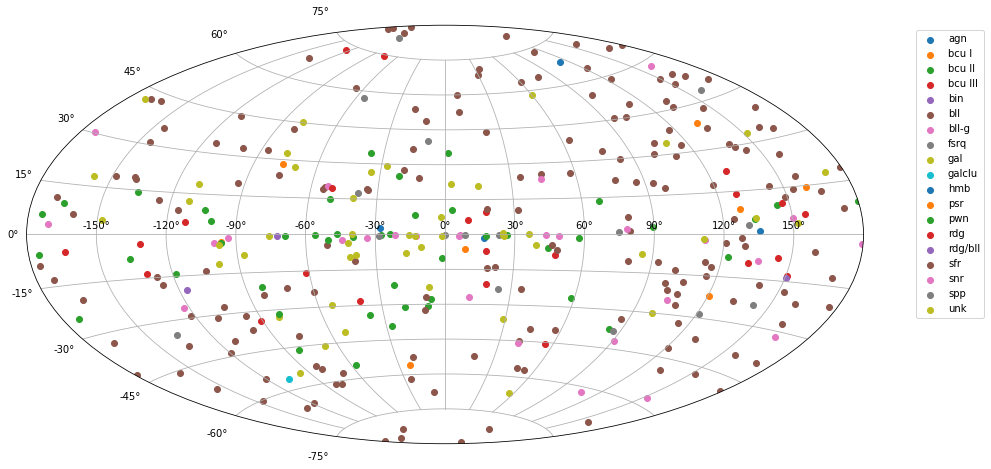

In [135]:
# sactter plot
plt.figure(figsize=(15, 8))
ax = plt.subplot(projection='aitoff')

glon = Angle(fermi_2['GLON'].quantity)
glon = glon.wrap_at('180d')

glat = Angle(fermi_2['GLAT'].quantity)

with quantity_support():
    for source_class in sorted(source_classes):
        selection = fermi_2['CLASS'] == source_class
        ax.scatter(glon[selection].rad, glat[selection].rad, label=source_class)
    ax.grid()
    plt.legend(bbox_to_anchor=(1.15, 1), loc=1) 

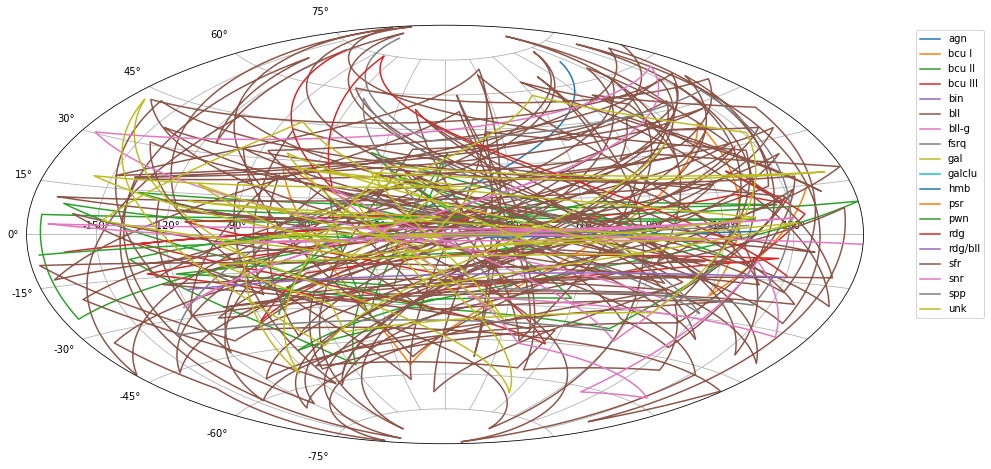

In [136]:
# line plot
plt.figure(figsize=(15, 8))
ax = plt.subplot(projection='aitoff')

glon = Angle(fermi_2['GLON'].quantity)
glon = glon.wrap_at('180d')

glat = Angle(fermi_2['GLAT'].quantity)

with quantity_support():
    for source_class in sorted(source_classes):
        selection = fermi_2['CLASS'] == source_class
        ax.plot(glon[selection].rad, glat[selection].rad, label=source_class)
    ax.grid()
    plt.legend(bbox_to_anchor=(1.15, 1), loc=1)

# FITS Images and WCS

### (easy) Read in the data from the other energy bands ('data/casa_1.5-3.0keV.fits.gz' and 'data/casa_4.0-6.0keV.fits.gz') as well, sum up all the data from the three energy bands. Plot the summed data using plt.imshow() again.)

In [137]:
from astropy.io import fits

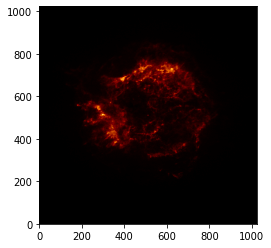

In [138]:
file1 = ['/Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz']
data_list = []

for file in file1:
    image_hdu = fits.open(file)['PRIMARY']
    data_list.append(image_hdu.data)
    
data_summed = np.sum(data_list, axis=0)
plt.imshow(data_summed, origin='lower', cmap='afmhot')

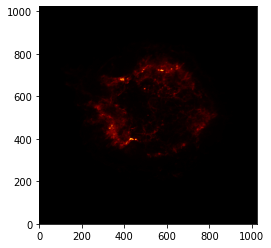

In [139]:
file2 = ['/Users/dhruvkumar/Desktop/casa_1.5-3.0keV.fits.gz']
data_list = []

for file in file2:
    image_hdu = fits.open(file)['PRIMARY']
    data_list.append(image_hdu.data)
    
data_summed = np.sum(data_list, axis=0)
plt.imshow(data_summed, origin='lower', cmap='afmhot')

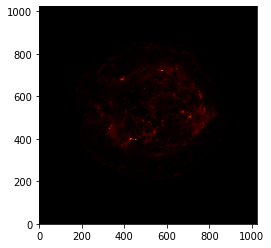

In [140]:
file3 = ['/Users/dhruvkumar/Desktop/casa_4.0-6.0keV.fits.gz']
data_list = []

for file in file3:
    image_hdu = fits.open(file)['PRIMARY']
    data_list.append(image_hdu.data)
    
data_summed = np.sum(data_list, axis=0)
plt.imshow(data_summed, origin='lower', cmap='afmhot')

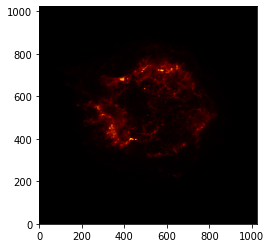

In [141]:
# let's combime these three files.
filenames = ['/Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz', '/Users/dhruvkumar/Desktop/casa_1.5-3.0keV.fits.gz',
             '/Users/dhruvkumar/Desktop/casa_4.0-6.0keV.fits.gz']

data_list = []

for filename in filenames:
    image_hdu = fits.open(filename)['PRIMARY']
    data_list.append(image_hdu.data)
    
data_summed = np.sum(data_list, axis=0)
plt.imshow(data_summed, origin='lower', cmap='afmhot')
# Cool

### (advanced) Cutout the central region of the image using astropy.nddata.Cutout2D (size of 0.05 deg x 0.05 deg around the position of 'Cas A'). Find the sky position of the brightest pixel in the cutout data. For this np.argmax() and np.unravel_index() might be helpful. Make sure you use the updated .data and .wcs attributes of the Cutout2D object to achieve the latter.


In [142]:
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS

In [149]:
#(rec, dec) of the brigestest pixel.
image_hdu = fits.open('/Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz')['PRIMARY']
wcs = WCS(image_hdu.header) 
image_data = image_hdu.data

pos_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

data_cutout = Cutout2D(image_data, position=pos_casa,
                       wcs=wcs, size=0.05 * u.deg)

# Find index of maximum value (this will return the
# index on the flattened array)
idx_flat = data_cutout.data.argmax()

# Transform back to the original shape
idx = np.unravel_index(idx_flat, data_cutout.data.shape)

# Transform to SkyCoord
pos = SkyCoord.from_pixel(*idx, wcs=data_cutout.wcs)
print("The position of the brightest pixel in the image is: {}".format(pos))
# here, we get the rac,dec coordinates of the brightest pixel from the give (fit.gz) file 

The position of the brightest pixel in the image is: <SkyCoord (ICRS): (ra, dec) in deg
    (350.86657467, 58.81187392)>


Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


### (very hard) Calculate a radial profile of the image data to estimate the size of the shell of the supernova remnant. For this sum up all the data within a set of rings (specified by radii_min and radii_max, choose a total minimum radius of 0 arcmin and total maximum radius of 5 arcmin) around the center position of Cas A. You can use np.indices() to get arrays of x and y pixel positions. Make sure you use clever numpy broadcasting to avoid a Python loop over the radii_min and radii_max arrays (hint: ndarray.reshape(-1, ...) might be useful to expand the data and radius array to the third dimension).

In [150]:
from astropy.wcs import WCS
from astropy.io import fits 
from astropy.coordinates import SkyCoord
from astropy.visualization import quantity_support

In [151]:
# open image
image_hdu = fits.open('/Users/dhruvkumar/Desktop/casa_1.5-3.0keV.fits.gz')['PRIMARY']
wcs = WCS(image_hdu.header)
image_data = image_hdu.data

Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


In [152]:
# define position and integration radius
pos_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

In [155]:
# create an array of sky positions for each pixel
yp, xp = np.indices(image_data.shape)
sky_positions = SkyCoord.from_pixel(xp=xp, yp=yp, wcs=wcs)

In [156]:
sky_positions

<SkyCoord (ICRS): (ra, dec) in deg
    [[(351.00119731, 58.74184873), (351.00093394, 58.74184897),
      (351.00067056, 58.7418492 ), ..., (350.73228624, 58.74181254),
      (350.73202286, 58.74181223), (350.73175948, 58.74181192)],
     [(351.00119777, 58.74198539), (351.00093439, 58.74198563),
      (351.00067101, 58.74198587), ..., (350.73228564, 58.74194921),
      (350.73202226, 58.7419489 ), (350.73175888, 58.74194858)],
     [(351.00119824, 58.74212206), (351.00093485, 58.7421223 ),
      (351.00067147, 58.74212254), ..., (350.73228504, 58.74208587),
      (350.73202166, 58.74208556), (350.73175828, 58.74208525)],
     ...,
     [(351.00166911, 58.881385  ), (351.00140467, 58.88138524),
      (351.00114023, 58.88138548), ..., (350.73167434, 58.88134861),
      (350.7314099 , 58.8813483 ), (350.73114546, 58.88134798)],
     [(351.00166957, 58.88152166), (351.00140513, 58.8815219 ),
      (351.00114069, 58.88152214), ..., (350.73167374, 58.88148527),
      (350.7314093 , 58.881484

In [154]:
# calculate separation image
separation = pos_casa.separation(sky_positions)

In [158]:
separation

<Angle [[0.09885047, 0.09875385, 0.09865733, ..., 0.09863822, 0.09873473,
         0.09883133],
        [0.09875391, 0.0986572 , 0.09856058, ..., 0.09854145, 0.09863805,
         0.09873475],
        [0.09865744, 0.09856063, 0.09846392, ..., 0.09844478, 0.09854147,
         0.09863826],
        ...,
        [0.09869654, 0.09859977, 0.09850309, ..., 0.09848394, 0.0985806 ,
         0.09867735],
        [0.09879304, 0.09869637, 0.09859979, ..., 0.09858065, 0.09867721,
         0.09877387],
        [0.09888964, 0.09879306, 0.09869657, ..., 0.09867746, 0.09877393,
         0.09887049]] deg>

In [159]:
# initialize radius arrays
radii = np.linspace(0, 5, 50).reshape(-1, 1, 1) * u.arcmin
radii_min, radii_max = radii[:-1], radii[1:]

In [160]:
radii_min

<Quantity [[[0.        ]],

           [[0.10204082]],

           [[0.20408163]],

           [[0.30612245]],

           [[0.40816327]],

           [[0.51020408]],

           [[0.6122449 ]],

           [[0.71428571]],

           [[0.81632653]],

           [[0.91836735]],

           [[1.02040816]],

           [[1.12244898]],

           [[1.2244898 ]],

           [[1.32653061]],

           [[1.42857143]],

           [[1.53061224]],

           [[1.63265306]],

           [[1.73469388]],

           [[1.83673469]],

           [[1.93877551]],

           [[2.04081633]],

           [[2.14285714]],

           [[2.24489796]],

           [[2.34693878]],

           [[2.44897959]],

           [[2.55102041]],

           [[2.65306122]],

           [[2.75510204]],

           [[2.85714286]],

           [[2.95918367]],

           [[3.06122449]],

           [[3.16326531]],

           [[3.26530612]],

           [[3.36734694]],

           [[3.46938776]],

           [[3.57142

In [161]:
radii_max

<Quantity [[[0.10204082]],

           [[0.20408163]],

           [[0.30612245]],

           [[0.40816327]],

           [[0.51020408]],

           [[0.6122449 ]],

           [[0.71428571]],

           [[0.81632653]],

           [[0.91836735]],

           [[1.02040816]],

           [[1.12244898]],

           [[1.2244898 ]],

           [[1.32653061]],

           [[1.42857143]],

           [[1.53061224]],

           [[1.63265306]],

           [[1.73469388]],

           [[1.83673469]],

           [[1.93877551]],

           [[2.04081633]],

           [[2.14285714]],

           [[2.24489796]],

           [[2.34693878]],

           [[2.44897959]],

           [[2.55102041]],

           [[2.65306122]],

           [[2.75510204]],

           [[2.85714286]],

           [[2.95918367]],

           [[3.06122449]],

           [[3.16326531]],

           [[3.26530612]],

           [[3.36734694]],

           [[3.46938776]],

           [[3.57142857]],

           [[3.67346

In [163]:
# mask out the annulus regions # considering an annular area.
mask = (separation > radii_min) & (separation < radii_max)

In [165]:
mask # True vale gives us the required values

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

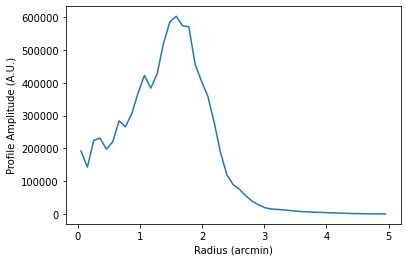

In [167]:
# Graph between Radius and Profile Amplitude.
data_masked = mask * image_data.reshape(-1, 1024, 1024)
data_summed = data_masked.sum(axis=-1).sum(axis=-1)

radius_center = (radii_min[:, 0, 0] + radii_max[:, 0, 0]) / 2.

r_dr = radius_center * (radii_max - radii_min).squeeze()

with quantity_support():
    plt.plot(radius_center, data_summed / (2 * np.pi * r_dr))
    plt.xlabel('Radius (arcmin)')
    plt.ylabel('Profile Amplitude (A.U.)')
# Expalain it?

### The most efficient implementation to measure radial profiles on images. Better solutions are based on counting pixels by indices. E.g. look at the implementation proposed here

##  Plotting of sky images 

### (easy) Make a combined plot of the Chandra data for all energy bands side by side (one row, three columns) and put the energy information in the title of the subplot. You can use e.g. plt.sublots().


In [170]:
from astropy.io import fits
from astropy.wcs import WCS

In [171]:
# We define a figure size, that has an aspect ratio to accomodate three plots side by side
fig = plt.figure(figsize=(15, 12))
filenames = ['/Users/dhruvkumar/Desktop/casa_0.5-1.5keV.fits.gz', '/Users/dhruvkumar/Desktop/casa_1.5-3.0keV.fits.gz', 
             '/Users/dhruvkumar/Desktop/casa_4.0-6.0keV.fits.gz']

<Figure size 1080x864 with 0 Axes>

Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


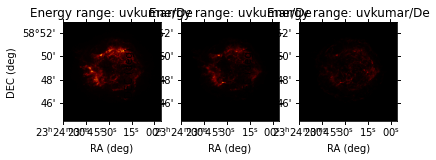

In [172]:
# For convenience we use a Python loop here, but the same can be achieved
# by copy and pasting the code for one energy band
for idx, filename in enumerate(filenames):
    image_hdu = fits.open(filename)['PRIMARY']
    wcs = WCS(image_hdu.header)
    ax = plt.subplot(1, 3, idx + 1, projection=wcs)
    ax.imshow(image_hdu.data, origin='lower', cmap='afmhot')
    
    # We extract the energy range from the filename, by setting it "by hand" is also fine
    energy_range = filename[10:20]
    ax.set_title('Energy range: {}'.format(energy_range))
    
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')

### (advanced) Make a combined RGB image of the Chandra data in different energy bands. Therefore you have to renormalize the data per energy band to the maximum value of respective energy band and combine the data into a 3d array with a shape that is recognised by plt.imshow() (check the matplotlib documentation!).

In [173]:
from astropy.visualization import AsinhStretch

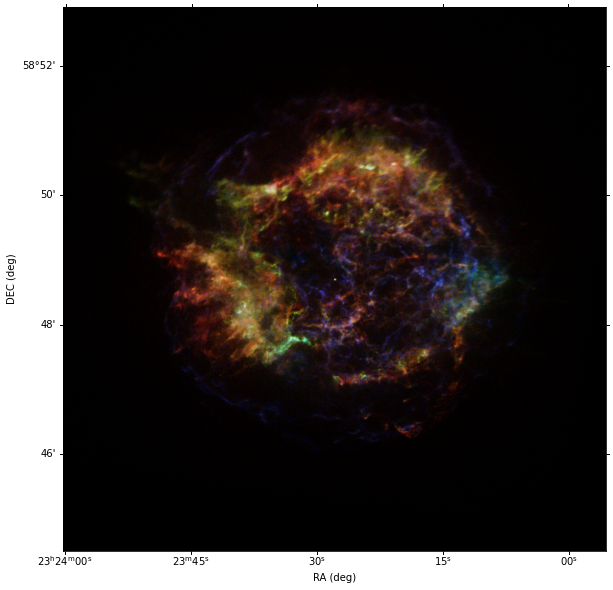

In [175]:
# use asinh stretching to brighten up the image
stretch = AsinhStretch(0.1)

data_rgb = []

for filename in filenames:
    image_hdu = fits.open(filename)['PRIMARY']
    data = image_hdu.data
    data /= data.max()
    data = stretch(data)
    data_rgb.append(data)

data_rgb_stacked = np.stack(data_rgb, axis=2)

plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.imshow(data_rgb_stacked, origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
# Beautiful!!!!!!!!!!!!!!